In [1]:
# from IPython.external import mathjax; mathjax.install_mathjax()

In [2]:
%matplotlib inline

import nsfg
resp = nsfg.ReadFemPreg()

In [3]:
import thinkstats2
import thinkplot
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
lives = resp[resp.outcome == 1]

In [5]:
first = lives[lives.birthord == 1]
others = lives[lives.birthord > 1]

In [6]:
first_pmf = thinkstats2.Pmf(first.totalwgt_lb, label="First")
other_pmf = thinkstats2.Pmf(others.totalwgt_lb, label="Other")

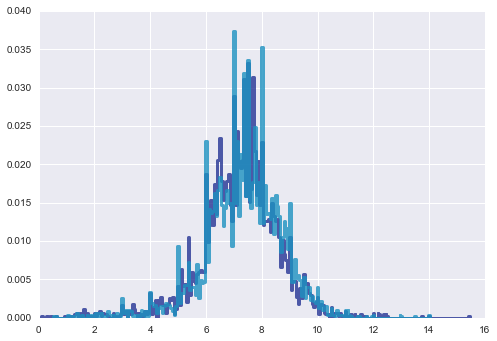

In [7]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([first_pmf,other_pmf])

In [8]:
def PercentileRank(scores, your_score):
    count = 0
    for score in scores:
        if score <= your_score:
            count+=1
    percentile_rank = 100*count/len(scores)
    return percentile_rank

In [9]:
PercentileRank([55,66,77,88,99], 88)

80.0

In [10]:
def Percentile(scores, percentile_rank):
    scores.sort()
    for score in scores:
        if (PercentileRank(scores,score) >= percentile_rank):
            return score

In [11]:
Percentile([55,66,77,99,88],50)

77

In [12]:
def Percentile2(scores, percentile_rank):
    scores.sort()
    index = percentile_rank*(len(scores) -1)//100
    return scores[index]

In [13]:
Percentile2([55,66,77,99,88],50)

77

In [14]:
def EvalCdf(sample, x):
    count = 0.0
    for value in sample:
        if value <=x:
            count+=1
    prob = count/len(sample)
    return prob

In [15]:
EvalCdf([55,66,77,88,99], 88)

0.8

In [16]:
for x in range(1,6):
    print(EvalCdf(range(1,6), x))

0.2
0.4
0.6
0.8
1.0


In [17]:
EvalCdf([55,66,77,88,99], 85)

0.6

In [18]:
X = thinkstats2.Cdf([55,66,77,88,99])

In [19]:
X.Prob(85)

0.59999999999999998

{'xscale': 'linear', 'yscale': 'linear'}

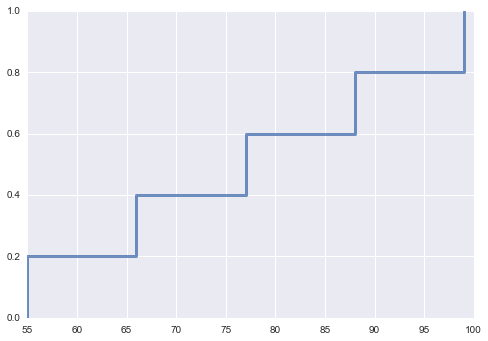

In [20]:
#import seaborn as sns
thinkplot.Cdf(X)

{'xscale': 'linear', 'yscale': 'linear'}

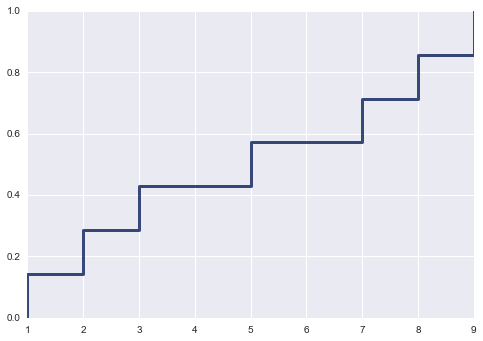

In [21]:
natural_numbers = thinkstats2.Cdf([1,2,3,5,7,8,9])
thinkplot.Cdf(natural_numbers)

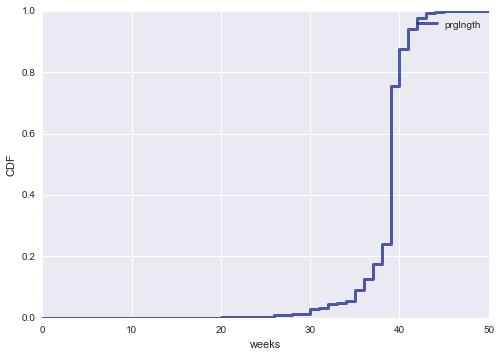

In [22]:
cdf = thinkstats2.Cdf(lives.prglngth, label="prglngth")
thinkplot.Cdf(cdf)
thinkplot.Show(xlabel="weeks", ylabel="CDF")

In [23]:
first_cdf = thinkstats2.Cdf(first.totalwgt_lb, label="first")
other_cdf = thinkstats2.Cdf(others.totalwgt_lb, label="others")

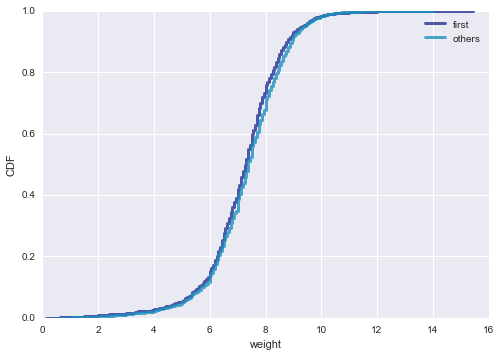

In [24]:
thinkplot.preplot(2)
thinkplot.Cdfs([first_cdf, other_cdf])
thinkplot.Show(xlabel="weight", ylabel="CDF")

In [25]:
first_cdf.PercentileRank(8)

75.681870272748114

In [26]:
first_cdf.Percentile(50)

7.3125

In [27]:
first_cdf.Percentile(80)

8.25

In [28]:
#CDF of percentile ranks

In [29]:
weights = lives.totalwgt_lb
cdf = thinkstats2.Cdf(weights, label="totalweight_lb")

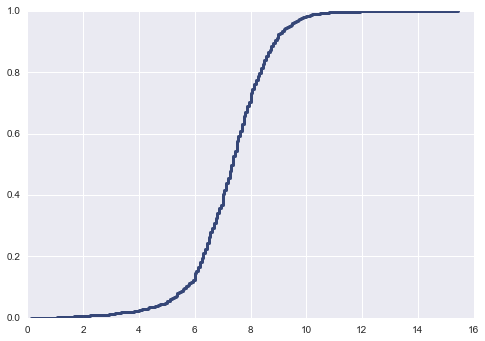

In [30]:
thinkplot.Pdf(cdf)

In [31]:
import numpy as np
sample = np.random.choice(weights, 100, replace=True)
ranks = [cdf.PercentileRank(x) for x in sample]

C:\Users\Kunal\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


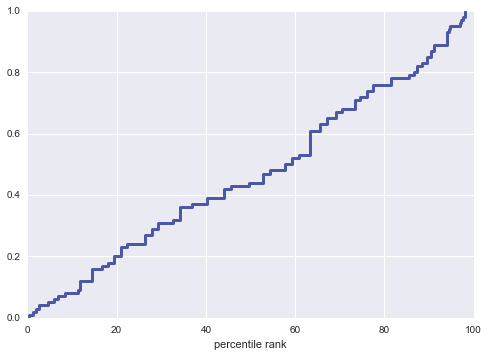

In [32]:
rank_cdf = thinkstats2.Cdf(ranks)
thinkplot.Cdf(rank_cdf)
thinkplot.Show(xlabel="percentile rank", ylabe="CDF")

In [33]:
def PercentileToPercentile(position, field_size):
    beat = field_size - position + 1
    percentile = 100*beat/field_size
    return percentile

In [34]:
PercentileToPercentile(4,100)

97.0

In [35]:
PercentileToPercentile(40,2000)

98.05